In [52]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Đọc dữ liệu rau, quả

In [53]:
with open("../../data/Rau, qua", "r", encoding="utf-16") as file:
    rauqua = file.read()

In [54]:
rauqua_df = pd.read_html(rauqua)[0]
rauqua_df.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_8248\1453333364.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  rauqua_df = pd.read_html(rauqua)[0]


(29593, 8)

In [55]:
rauqua_df.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
0,Bắp cải,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
1,Bắp cải thảo,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
2,Bưởi da xanh,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,35000.0
3,Bưởi Diễn,Sơn La,Bán lẻ,VNĐ/quả,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,10000.0
4,Cà chua,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,12000.0


# Kiểm tra dữ liệu thiếu

In [56]:
rauqua_df.isnull().sum()

Tên_mặt_hàng    0
Thị_trường      0
Loại_giá        0
Đơn_vị_tính     0
Loại_tiền       0
Nguồn           0
Ngày            0
Giá             0
dtype: int64

# Kiểm tra dữ liệu thừa

In [57]:
rauqua_df.duplicated().sum()

np.int64(0)

# Kiểm tra giá trị ngoại lai

In [58]:
gia_rauqua = rauqua_df["Giá"]

<Axes: ylabel='Giá'>

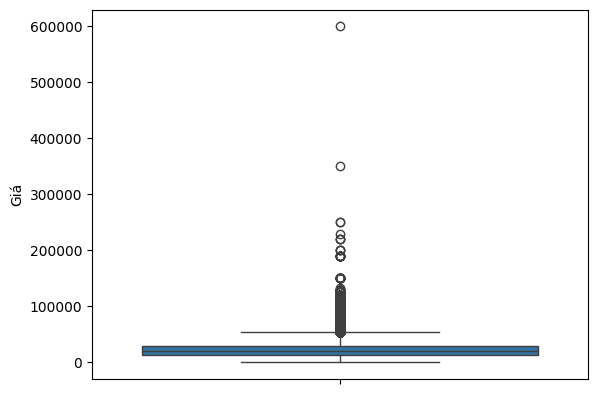

In [59]:
sns.boxplot(gia_rauqua)

In [60]:
q1 = np.quantile(gia_rauqua, 0.25)
q3 = np.quantile(gia_rauqua, 0.75)
iqr = q3 - q1
min_rauqua = q1 - 1.5 * iqr 
max_rauqua = q3 + 1.5 * iqr
print(min_rauqua, max_rauqua)

-10000.0 54000.0


In [61]:
outlier_rauqua = rauqua_df[(rauqua_df["Giá"] < min_rauqua) | (rauqua_df["Giá"] > max_rauqua)]
outlier_rauqua.head()

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
12,Mận hậu,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/19/2025 12:00:00 AM,60000.0
32,Bưởi da xanh,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,5/13/2025 12:00:00 AM,65000.0
36,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,5/13/2025 12:00:00 AM,55000.0
41,Măng cụt,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,5/13/2025 12:00:00 AM,70000.0
64,Mận hậu,Sơn La,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,5/12/2025 12:00:00 AM,60000.0


In [62]:
outlier_rauqua.shape

(2337, 8)

## Kiểm tra ngoại lai từng mặt hàng

In [63]:
outlier_mathang = outlier_rauqua["Tên_mặt_hàng"].unique()
outlier_mathang

array(['Mận hậu', 'Bưởi da xanh', 'Chôm chôm', 'Măng cụt', 'Dừa tươi',
       'Sầu Riêng Ri 6 (loại đẹp)', 'Nhãn', 'Sầu Riêng Ri 6 (loại xô)',
       'Dâu tây', 'Măng tây', 'Xoài Cát Chu', 'Na thái', 'Cam canh',
       'Na sầu riêng', 'Vú sữa', 'Cam cara ruột đỏ', 'Cam ly không hạt',
       'Chanh leo vàng', 'Mận hậu trái vụ', 'Quýt Sài Gòn', 'Hồng giòn',
       'Na', 'Lê xanh', 'Đào mỏ quạ', 'Xoài Đài Loan', 'Lê Tai Nung',
       'Vải', 'Dâu tây Hana', 'Na Đài Loan', 'Táo đại', 'Cam Canh',
       'Quýt', 'Na Thái', 'Quýt Sài gòn', 'Hồng ngâm',
       'Sầu riêng cơm vàng hạt lép', 'Xoài cát Hòa Lộc', 'Dừa', 'Dừa khô',
       'Sầu Riêng Ri 6', 'Dừa xiêm lai', 'Dừa xiêm xanh', 'Hạt ca cao',
       'Mít ruột đỏ', 'Nhãn xuồng trắng', 'Cam sành (loại 2)',
       'Trái dứa/thơm', 'Nhãn tiêu da bò', 'Trái dứa/thơm (nhỏ)',
       'Sầu riêng KQX', 'Đào', 'Súp lơ', 'Chôm chôm thái', 'Lựu',
       'Cam sành', 'Ổi', 'Bông cải Xanh', 'Nhãn xuồng vàng', 'Sầu riêng',
       'Quả bầu', 'Mướp', 'Trái d

In [64]:
filtered_mathang = []

for value in outlier_mathang:

    mathang_df = rauqua_df[rauqua_df["Tên_mặt_hàng"] == value]
    gia_mathang = mathang_df["Giá"]

    q1 = np.quantile(gia_mathang, 0.25)
    q3 = np.quantile(gia_mathang, 0.75)
    iqr = q3 - q1
    min_mathang = q1 - 1.5 * iqr
    max_mathang = q3 + 1.5 * iqr

    ngoailai = np.sum((mathang_df["Giá"] < min_mathang) | (mathang_df["Giá"] > max_mathang))
    if ngoailai:
        filtered_mathang.append(value)

In [65]:
print(len(outlier_mathang))

65


In [66]:
print(len(filtered_mathang))

32


In [67]:
print(filtered_mathang)

['Chôm chôm', 'Măng cụt', 'Nhãn', 'Dâu tây', 'Na thái', 'Cam canh', 'Cam cara ruột đỏ', 'Quýt Sài Gòn', 'Na', 'Lê xanh', 'Đào mỏ quạ', 'Xoài Đài Loan', 'Vải', 'Na Thái', 'Sầu riêng cơm vàng hạt lép', 'Xoài cát Hòa Lộc', 'Sầu Riêng Ri 6', 'Dừa xiêm lai', 'Dừa xiêm xanh', 'Mít ruột đỏ', 'Cam sành (loại 2)', 'Trái dứa/thơm', 'Nhãn tiêu da bò', 'Trái dứa/thơm (nhỏ)', 'Đào', 'Lựu', 'Ổi', 'Bông cải Xanh', 'Quả bầu', 'Mướp', 'Trái dứa/thơm (to)', 'Bưởi Diễn']


### Kiểm tra chôm chôm

In [68]:
rauqua_df[rauqua_df["Tên_mặt_hàng"] == "Chôm chôm"]

,Tên_mặt_hàng,Thị_trường,Loại_giá,Đơn_vị_tính,Loại_tiền,Nguồn,Ngày,Giá
36,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,5/13/2025 12:00:00 AM,55000.0
3243,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,10/18/2024 12:00:00 AM,55000.0
3320,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,10/15/2024 12:00:00 AM,55000.0
3371,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,10/11/2024 12:00:00 AM,55000.0
3449,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/kg,VNĐ,CTV địa phương,10/8/2024 12:00:00 AM,55000.0
...,...,...,...,...,...,...,...,...
27808,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,7/9/2021 12:00:00 AM,30000.0
27843,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,7/8/2021 12:00:00 AM,30000.0
27916,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,7/6/2021 12:00:00 AM,30000.0
27992,Chôm chôm,Hà Nội,Bán lẻ,VNĐ/Kg,VNĐ,CTV địa phương,7/2/2021 12:00:00 AM,35000.0
